# Magic and loading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
# importing data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_excel('/content/drive/MyDrive/07 - Six - Team only/Raw data copy/Time_Series_Merchants_Transactions_Anonymized.xlsx',)

# Exploratory Data Analysis

## DataFrame formatting

In [4]:
# replacing index

data = data.set_index('Merchant Name')

In [5]:
# replacing columns names with standard date format

dates = pd.date_range(start='2020-08', end='2022-10', freq="M")
data.columns = dates

In [6]:
data.head()

,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
Merchant Name,,,,,,,,,,,,,,,,,,,,,
Merchant 1,416772.0,395324.0,411329.0,475679.0,497747.0,445429.0,505033.0,477349.0,496073.0,576800.0,...,644293.0,700144.0,611675.0,639038.0,616915.0,686572.0,630707.0,622073.0,667523.0,668189.0
Merchant 2,21.0,24.0,13.0,21.0,4.0,80.0,1.0,24.0,183.0,31.0,...,11.0,119.0,62.0,52.0,432.0,86.0,108.0,72.0,101.0,80.0
Merchant 3,1.0,1.0,0.0,0.0,50.0,3.0,4.0,4.0,0.0,16.0,...,50.0,0.0,0.0,0.0,0.0,0.0,49.0,1.0,1.0,0.0
Merchant 4,159.0,168.0,155.0,152.0,160.0,149.0,147.0,152.0,170.0,150.0,...,175.0,159.0,180.0,162.0,183.0,172.0,198.0,183.0,226.0,185.0
Merchant 5,70.0,27.0,60.0,63.0,80.0,57.0,75.0,73.0,85.0,96.0,...,132.0,147.0,129.0,127.0,131.0,159.0,150.0,160.0,154.0,168.0


## Basic data information

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, Merchant 1 to Merchant 1913
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   2020-08-31 00:00:00  1913 non-null   float64
 1   2020-09-30 00:00:00  1913 non-null   float64
 2   2020-10-31 00:00:00  1913 non-null   float64
 3   2020-11-30 00:00:00  1913 non-null   float64
 4   2020-12-31 00:00:00  1913 non-null   float64
 5   2021-01-31 00:00:00  1913 non-null   float64
 6   2021-02-28 00:00:00  1913 non-null   float64
 7   2021-03-31 00:00:00  1913 non-null   float64
 8   2021-04-30 00:00:00  1913 non-null   float64
 9   2021-05-31 00:00:00  1913 non-null   float64
 10  2021-06-30 00:00:00  1913 non-null   float64
 11  2021-07-31 00:00:00  1913 non-null   float64
 12  2021-08-31 00:00:00  1913 non-null   float64
 13  2021-09-30 00:00:00  1913 non-null   float64
 14  2021-10-31 00:00:00  1913 non-null   float64
 15  2021-11-30 00:00:00  1913

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
2020-08-31,1913.0,3127.611082,32145.389648,0.0,0.0,1.0,55.0,913338.0
2020-09-30,1913.0,2909.845269,28463.078572,0.0,0.0,3.0,80.0,898677.0
2020-10-31,1913.0,2995.377418,27479.063623,0.0,0.0,6.0,167.0,916564.0
2020-11-30,1913.0,3210.400941,29424.164599,0.0,0.0,4.0,103.0,906939.0
2020-12-31,1913.0,3695.777836,35917.945660,0.0,0.0,4.0,101.0,926654.0
2021-01-31,1913.0,3382.475693,28692.027233,0.0,0.0,9.0,242.0,916773.0
2021-02-28,1913.0,3333.160481,32250.588024,0.0,0.0,4.0,101.0,938441.0
2021-03-31,1913.0,3343.095139,30067.244132,0.0,0.0,8.0,137.0,926510.0
2021-04-30,1913.0,3185.047047,29463.033345,0.0,0.0,13.0,213.0,936356.0
2021-05-31,1913.0,3565.061160,31606.007426,0.0,0.0,6.0,111.0,927353.0


## 0 values

In [9]:
data.eq(0).sum(axis=1)

Merchant Name
Merchant 1        0
Merchant 2        0
Merchant 3       12
Merchant 4        0
Merchant 5        0
                 ..
Merchant 1909    25
Merchant 1910    25
Merchant 1911    25
Merchant 1912    25
Merchant 1913    25
Length: 1913, dtype: int64

In [10]:
data.eq(0).sum(axis=1).max()

25

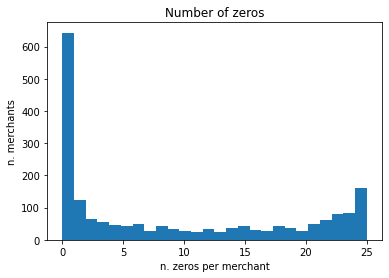

In [11]:
plt.hist(data.eq(0).sum(axis=1), bins=26)
plt.title('Number of zeros')
plt.xlabel('n. zeros per merchant')
plt.ylabel('n. merchants')
plt.show();

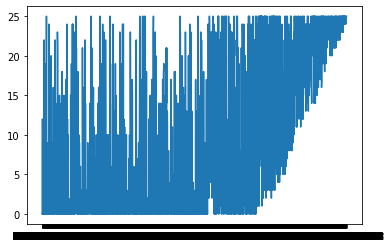

In [12]:
plt.plot(data.eq(0).sum(axis=1));

## Merchant 1 sample analysis

In [13]:
# number of transaction for merchant 1

data.iloc[0]

2020-08-31    416772.0
2020-09-30    395324.0
2020-10-31    411329.0
2020-11-30    475679.0
2020-12-31    497747.0
2021-01-31    445429.0
2021-02-28    505033.0
2021-03-31    477349.0
2021-04-30    496073.0
2021-05-31    576800.0
2021-06-30    562823.0
2021-07-31    552480.0
2021-08-31    587687.0
2021-09-30    539167.0
2021-10-31    577108.0
2021-11-30    609213.0
2021-12-31    644293.0
2022-01-31    700144.0
2022-02-28    611675.0
2022-03-31    639038.0
2022-04-30    616915.0
2022-05-31    686572.0
2022-06-30    630707.0
2022-07-31    622073.0
2022-08-31    667523.0
2022-09-30    668189.0
Freq: M, Name: Merchant 1, dtype: float64

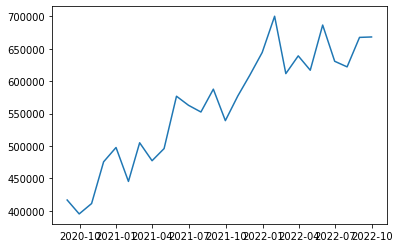

In [14]:
# number of transaction for merchant 1

plt.plot(data.iloc[0]);

# data seems not stationary => differencing required (d)

### Autocorrelation

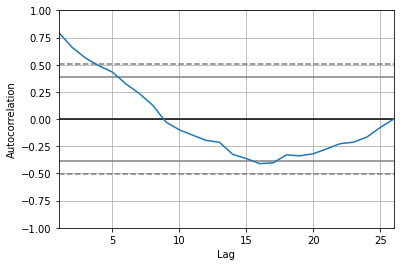

In [15]:
# autocorrelation of number of transaction for merchant 1

autocorrelation_plot(data.iloc[0]);

# positive autocorrelation between the first ~7 lags (p)

### Auroregressive integrated moving average (ARIMA)

In [16]:
# p = number of lag observations included in the model = 7
# d = number of times that the raw observation are differenced = 1
# q = size of moving average window (order of moving average) = 0

In [17]:
# fit model

model = ARIMA(data.iloc[0], order=(7,1,0))
model_fit = model.fit()

# summary of fit model

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Merchant 1   No. Observations:                   26
Model:                 ARIMA(7, 1, 0)   Log Likelihood                -299.781
Date:                Tue, 22 Nov 2022   AIC                            615.562
Time:                        10:31:32   BIC                            625.313
Sample:                    08-31-2020   HQIC                           618.266
                         - 09-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1170      0.123     -0.948      0.343      -0.359       0.125
ar.L2          0.0488      0.249      0.196      0.845      -0.439       0.536
ar.L3          0.1367      0.185      0.738      0.4

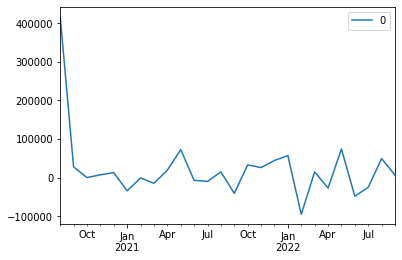

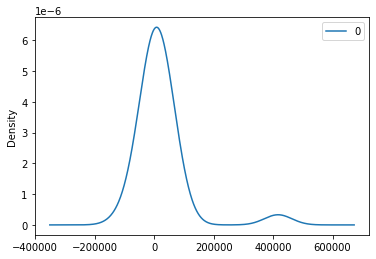

                   0
count      26.000000
mean    22152.759559
std     89193.481602
min    -94915.319317
25%    -13397.125996
50%     10133.689339
75%     31728.737805
max    416772.000000


In [18]:
# line plot of residuals

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# spacing
print()

# density plot of residuals

residuals.plot(kind='kde')
plt.show()

# summary stats of residuals

print(residuals.describe())

### ARIMA train test split

In [19]:
# 14 months train
# 12 months test

series_train = data.iloc[0][:14]
series_test = data.iloc[0][14:]

In [20]:
# fit model

model2 = ARIMA(data.iloc[0], order=(7,1,0))
model2_fit = model.fit()

# summary of fit model

print(model2_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Merchant 1   No. Observations:                   26
Model:                 ARIMA(7, 1, 0)   Log Likelihood                -299.781
Date:                Tue, 22 Nov 2022   AIC                            615.562
Time:                        10:31:32   BIC                            625.313
Sample:                    08-31-2020   HQIC                           618.266
                         - 09-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1170      0.123     -0.948      0.343      -0.359       0.125
ar.L2          0.0488      0.249      0.196      0.845      -0.439       0.536
ar.L3          0.1367      0.185      0.738      0.4

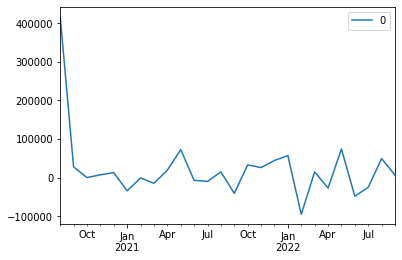

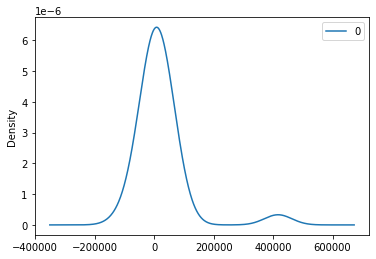

                   0
count      26.000000
mean    22152.759559
std     89193.481602
min    -94915.319317
25%    -13397.125996
50%     10133.689339
75%     31728.737805
max    416772.000000


In [21]:
# line plot of residuals

residuals = pd.DataFrame(model2_fit.resid)
residuals.plot()
plt.show()

# spacing
print()

# density plot of residuals

residuals.plot(kind='kde')
plt.show()

# summary stats of residuals

print(residuals.describe())

### ARIMA rolling forecast

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=561886.758265, expected=539167.000000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=581632.039511, expected=577108.000000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=650119.877393, expected=609213.000000
predicted=596727.600313, expected=644293.000000
predicted=645093.049295, expected=700144.000000
predicted=716333.820773, expected=611675.000000
predicted=615756.938459, expected=639038.000000
predicted=643500.405074, expected=616915.000000
predicted=608636.659526, expected=686572.000000
predicted=684119.481609, expected=630707.000000
predicted=651385.036188, expected=622073.000000
predicted=614323.137902, expected=667523.000000
predicted=660940.232447, expected=668189.000000
Test RMSE: 49903.089


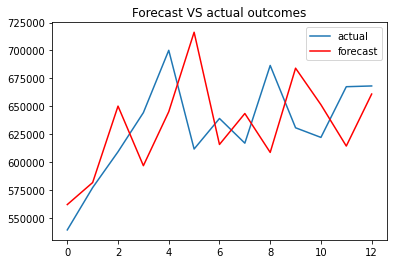

In [22]:
# ARIMA model using a walk-forward validation

# load dataset

series = data.iloc[0]
series.index = series.index.to_period('M')

# split into train and test sets

X = series.values
size = int(len(X) * 0.5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
hist_pred = [x for x in train]
predictions = list()

# walk-forward validation
# 

for t in range(len(test)):
	model3 = ARIMA(history, order=(7,1,0))
	model3_fit = model3.fit()
	output = model3_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	hist_pred.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes

plt.plot(test, label='actual')
plt.plot(predictions, color='red', label='forecast')
plt.title('Forecast VS actual outcomes')
plt.legend()
plt.show();

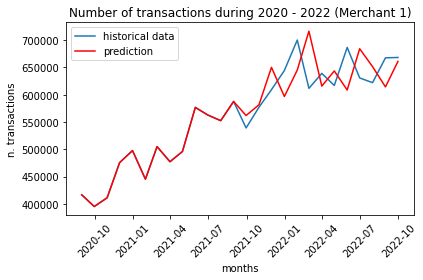

In [23]:
# train + test vs train + pred

plt.plot(dates, data.iloc[0].values, label='historical data')
plt.plot(dates, hist_pred, color='red', label='prediction')
plt.title('Number of transactions during 2020 - 2022 (Merchant 1)')
plt.xlabel('months')
plt.ylabel('n. transactions')
plt.xticks(rotation = 45)
plt.legend()
plt.tight_layout()
plt.show();

### Seasonal decomposition

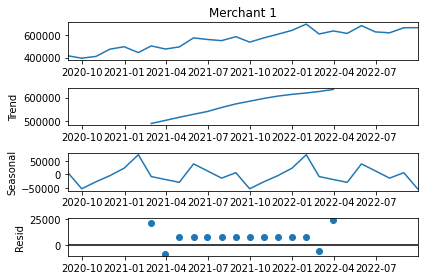

In [24]:
# trend seasonal decomposition additive

output = seasonal_decompose(data.iloc[0], model='addivite')
output.plot();

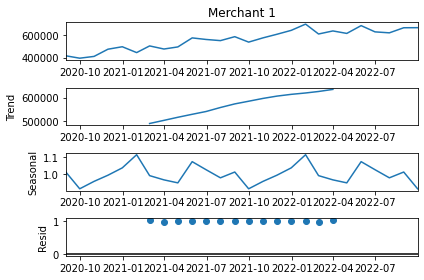

In [25]:
# trend seasonal decomposition multiplicative

output = seasonal_decompose(data.iloc[0], model='multiplicative')
output.plot();

## DataFrame Scaling

In [26]:
# scaling df with StandardScaler

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.T).T, columns=data.columns)
data_scaled.insert(0, 'Merchant Name', data.index)
data_scaled = data_scaled.set_index('Merchant Name')
data_scaled

,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
Merchant Name,,,,,,,,,,,,,,,,,,,,,
Merchant 1,-1.660589,-1.905759,-1.722807,-0.987229,-0.734972,-1.333014,-0.651686,-0.968139,-0.754107,0.168675,...,0.940181,1.578608,0.567328,0.880112,0.627226,1.423468,0.784881,0.686186,1.205721,1.213334
Merchant 2,-0.521556,-0.486119,-0.616053,-0.521556,-0.722363,0.175366,-0.757800,-0.486119,1.392026,-0.403433,...,-0.639678,0.636043,-0.037254,-0.155376,4.333272,0.246240,0.506109,0.080868,0.423423,0.175366
Merchant 3,-0.447953,-0.447953,-0.504491,-0.504491,2.322398,-0.334878,-0.278340,-0.278340,-0.504491,0.400113,...,2.322398,-0.504491,-0.504491,-0.504491,-0.504491,-0.504491,2.265860,-0.447953,-0.447953,-0.504491
Merchant 4,-0.440060,0.064715,-0.664404,-0.832663,-0.383974,-1.000921,-1.113093,-0.832663,0.176887,-0.944835,...,0.457317,-0.440060,0.737748,-0.271802,0.906006,0.289059,1.747297,0.906006,3.317708,1.018178
Merchant 5,-0.991168,-2.150296,-1.260733,-1.179863,-0.721604,-1.341602,-0.856386,-0.910299,-0.586821,-0.290300,...,0.680132,1.084479,0.599263,0.545350,0.653176,1.407956,1.165348,1.434913,1.273174,1.650564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Merchant 1909,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,...,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,5.000000
Merchant 1910,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,...,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,5.000000
Merchant 1911,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,...,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,5.000000
